In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/Users/walfits/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = np.loadtxt("/Volumes/Transcend/calculations/descriptor_speed/batches_memory.txt")
print(data.shape)

(75, 3)


In [3]:
samples = data[:,0]
batches = data[:,1]
memory = data[:,2]

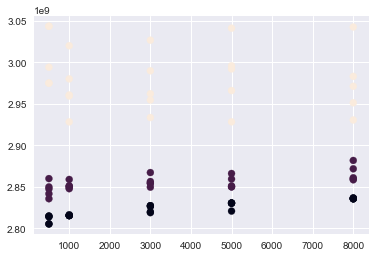

In [4]:
plt.scatter(samples, memory, marker='o', c=batches)
plt.show()

In [5]:
unique_batches = np.unique(batches)

In [6]:
new_samples = []
new_memory = []

for i in range(len(unique_batches)):
    temp_samples = []
    temp_memory = []
    for j in range(len(batches)):
        if batches[j] == unique_batches[i]:
            temp_samples.append(samples[j])
            temp_memory.append(memory[j])
    new_samples.append(temp_samples)
    new_memory.append(temp_memory)

In [7]:
unique_samples = []
mean_memory = []
stdev_memory = []
iters = 5

for i in range(len(unique_batches)):
    temp_samples = []
    temp_mean_memory = []
    temp_std_memory = []
    for j in range(0, len(new_samples[i]), iters):
        temp_samples.append(new_samples[i][j])
        mean = np.mean(new_memory[i][j:j+iters]) *  9.31e-10
        stdv = np.std(new_memory[i][j:j+iters]) *  9.31e-10
        temp_mean_memory.append(mean)
        temp_std_memory.append(stdv)   
    unique_samples.append(temp_samples)
    mean_memory.append(temp_mean_memory)
    stdev_memory.append(temp_std_memory)

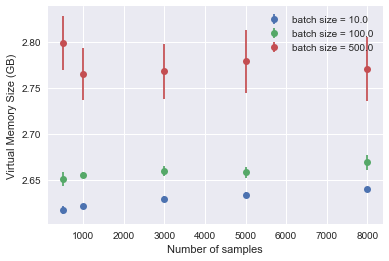

In [8]:
for i in range(len(unique_batches)):
    lab="batch size = " + str(unique_batches[i])
    plt.errorbar(unique_samples[i], mean_memory[i], yerr=stdev_memory[i], fmt='o', label=lab)
    
plt.xlabel("Number of samples")
plt.ylabel("Virtual Memory Size (GB)")
plt.legend()
plt.show()